In [1]:
import numpy as np
import datasets
import tensorflow as tf
from tensorflow.keras import activations, layers, models, metrics
import matplotlib.pyplot as plt
from parameters import Parameters
import convtas
from loss import LOGL2,SDR,SISNR,SDSDR,SISDR


First thing we are going to do is to just load our data in. The data when being put through a TensorFlow should be organized in a very specific way. Right now each observation in our data is organized like this : $(2\cdot M,K,L)$

- $M$ = 100; Batch number, remember each batch observation is 2 tensors each one correlating to the left/right audio channel.
- $K$ = 40; Index/number of overlapping chunks of waveform.
- $L$ = 16; Length of a chunk/sample of data. For this study we will refer to these as chunks.

For our outputs the data is structured like: $(2\cdot M,C,K,L)$

- $C$ = 4; Denotes the source target.

In [2]:
arr = np.array(range(5))
len(arr)

5

In [6]:
arr[5:]

array([], dtype=int32)

In [3]:
loss = SDSDR()
loss(x,y)

<tf.Tensor: shape=(), dtype=float32, numpy=-58.575706>

In [21]:
M, C = alpha.shape
alpha = tf.reshape(alpha, (M, C, 1))

In [2]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


Num GPUs Available:  1


In [4]:
def make_med_dataset():
    datasets = [tf.data.Dataset.load(f'tensors/tensor_dataset_small_{i}') for i in range(10)]

    for i, data in enumerate(datasets):
        if i == 0:
            dataset = data
        else: 
            dataset = dataset.concatenate(data)
    
    dataset.save('tensors/tensor_dataset_medium')

make_med_dataset()

In [2]:
dataset = tf.data.Dataset.load(f'data_v2/tensor_full_no1')

In [74]:
dataset_small = tf.data.Dataset.load(f'data_v2/tensor_test_8')

In [8]:
for i, batch in enumerate(dataset):
    if i==0:
        x_0,y_0 = batch
    break
x_0.shape

TensorShape([100, 400])

In [5]:
print(tf.data.experimental.cardinality(dataset).numpy())

9099


In [3]:
param = Parameters(casual=False)

In [4]:
cnn = convtas.ConvTasNet(param)

In [5]:
cnn.load_weights('training_final_full/cp.ckpt')

In [9]:
output_x_0 = cnn(x_0)

In [9]:
output_x_0.shape

TensorShape([50, 4, 4000])

In [10]:
y_0.shape

TensorShape([50, 4, 4000])

ok so the issue here is that i am running out of memory within my gpu. so i can do a couple of different things. First off this is strange as i feel like it did train on data with higher amounts of data than this but maybe i am incorrect as that would be like what 17000x40x512 which is maybe lower than 200x3999x128

In [3]:
def run_model(model, loss: str, loss_funct, dataset, epochs=10):
    # Create a callback that saves the model's weights every 5 epochs
    checkpoint_path = f"training_{loss}_2/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                    save_weights_only=True,
                                                    verbose=1)
    
    model.compile(optimizer='adam',
              loss=loss_funct,
              metrics=['accuracy']
              )
    
    history = model.fit(dataset, epochs=epochs, callbacks=[cp_callback])

    return history

def create_fit_save(dataset, epochs=10):
    param = Parameters()
    cnn = convtas.ConvTasNet(param)
    v
    hist1 = run_model(cnn, "LOGL2", LOGL2(), dataset, epochs=8)
    cnn = convtas.ConvTasNet(param)
    hist2 = run_model(cnn, "SDR", SDR(), dataset)
    
    return hist1, hist2
    


In [6]:
import tensorflow as tf

# Assuming 'model' is your compiled model and 'data' is your input tensor
with tf.GradientTape() as tape:
    output = cnn(x_0)
    loss = tf.reduce_mean(output)  # Example loss function

# Get the gradients
grads = tape.gradient(loss, cnn.trainable_variables)

# Print out gradients to see if they exist
for grad, var in zip(grads, cnn.trainable_variables):
    if grad is None:
        print(f"No gradient for {var.name}")
    else:
        print(f"Gradient for {var.name} exists")

Gradient for ConvTasNet/Encoder/conv1d/kernel:0 exists
Gradient for Global Gamma:0 exists
Gradient for Global Beta:0 exists
Gradient for ConvTasNet/Separator/conv1d_1/kernel:0 exists
Gradient for ConvTasNet/Separator/conv1d_1/bias:0 exists
Gradient for ConvTasNet/Separator/TemporalConv/Conv1DBlock/conv1d_2/kernel:0 exists
Gradient for ConvTasNet/Separator/TemporalConv/Conv1DBlock/conv1d_2/bias:0 exists
Gradient for ConvTasNet/Separator/TemporalConv/Conv1DBlock/p_re_lu/alpha:0 exists
Gradient for Global Gamma:0 exists
Gradient for Global Beta:0 exists
Gradient for Global Gamma:0 exists
Gradient for Global Beta:0 exists
Gradient for ConvTasNet/Separator/TemporalConv/Conv1DBlock/DepthwiseConv/conv1d_3/kernel:0 exists
Gradient for ConvTasNet/Separator/TemporalConv/Conv1DBlock/DepthwiseConv/conv1d_3/bias:0 exists
Gradient for ConvTasNet/Separator/TemporalConv/Conv1DBlock/DepthwiseConv/p_re_lu_1/alpha:0 exists
Gradient for ConvTasNet/Separator/TemporalConv/Conv1DBlock/DepthwiseConv/dense/ker

In [6]:
param = Parameters(casual=False)

In [10]:
y_0

<tf.Tensor: shape=(50, 4, 1200), dtype=float32, numpy=
array([[[-3.35302507e-03, -3.35302507e-03, -3.35302507e-03, ...,
         -3.35302507e-03, -3.35302507e-03, -3.35302507e-03],
        [-4.89951903e-03, -3.86852305e-03, -3.35302507e-03, ...,
         -3.35302507e-03, -3.86852305e-03, -3.86852305e-03],
        [-3.35302507e-03, -3.35302507e-03, -3.35302507e-03, ...,
         -3.35302507e-03, -3.35302507e-03, -3.35302507e-03],
        [-1.88179668e-02, -1.72714721e-02, -1.52094802e-02, ...,
          8.50343052e-03,  1.26274154e-02,  1.46894073e-02]],

       [[-3.35302507e-03, -3.35302507e-03, -3.35302507e-03, ...,
         -3.35302507e-03, -3.35302507e-03, -3.35302507e-03],
        [-3.35302507e-03, -3.35302507e-03, -2.83752684e-03, ...,
         -2.32202886e-03, -2.32202886e-03, -1.80653075e-03],
        [-3.35302507e-03, -3.35302507e-03, -3.35302507e-03, ...,
         -3.35302507e-03, -3.35302507e-03, -3.35302507e-03],
        [-2.24264525e-02, -2.08799597e-02, -1.72714721e-02, .

In [7]:
class GradientMonitor(tf.keras.callbacks.Callback):
    def on_batch_end(self, batch, logs=None):
        for layer in self.model.layers:
            if hasattr(layer, 'kernel'):
                grads = self.model.optimizer.get_gradients(self.model.total_loss, layer.kernel)
                grads_values = [g.numpy() for g in grads if g is not None]
                if grads_values:
                    max_grad = np.max([np.max(g) for g in grads_values])
                    min_grad = np.min([np.min(g) for g in grads_values])
                    print(f'{layer.name} - Max grad: {max_grad}, Min grad: {min_grad}')


In [9]:
checkpoint_path = f"training_final_full_no1/cp.ckpt"

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                    save_weights_only=True,
                                                    verbose=1)
cnn = convtas.ConvTasNet(param)

cnn.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='mse',
            metrics=['accuracy', SDSDR(), SISDR(), LOGL2(), 'cosine_similarity'])

history = cnn.fit(dataset, epochs=2, callbacks=[GradientMonitor(),cp_callback])

Epoch 1/2
9004/9004 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.0789 - sdsdr: inf - sisdr: inf - logl2: -inf - cosine_similarity: 0.4433
Epoch 1: saving model to training_final_full_no1\cp.ckpt
9004/9004 [==============================] - 3779s 417ms/step - loss: 0.0020 - accuracy: 0.0789 - sdsdr: inf - sisdr: inf - logl2: -inf - cosine_similarity: 0.4433
Epoch 2/2
9004/9004 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.0809 - sdsdr: inf - sisdr: inf - logl2: -inf - cosine_similarity: 0.4460
Epoch 2: saving model to training_final_full_no1\cp.ckpt
9004/9004 [==============================] - 3854s 428ms/step - loss: 0.0019 - accuracy: 0.0809 - sdsdr: inf - sisdr: inf - logl2: -inf - cosine_similarity: 0.4460


In [95]:
for i, batch in enumerate(dataset_small):
    if i==77:
        x_0,y_0 = batch
        break
x_0.shape

TensorShape([100, 400])

In [67]:
np.all(np.array(x_0[1])==0.0)

False

In [101]:
y_0

<tf.Tensor: shape=(100, 4, 400), dtype=float32, numpy=
array([[[-1.19934082e-02, -2.23388672e-02, -1.71508789e-02, ...,
         -6.01196289e-03,  7.32421875e-04, -4.03442383e-02],
        [ 1.21337891e-01,  1.12304688e-01,  1.22375488e-01, ...,
          4.99877930e-02,  4.58679199e-02,  5.11169434e-02],
        [ 2.34985352e-03,  3.02124023e-03,  4.97436523e-03, ...,
         -1.11389160e-01, -1.03973389e-01, -9.60388184e-02],
        [ 8.04138184e-02,  9.32922363e-02,  8.75244141e-02, ...,
          4.27246094e-03, -7.29370117e-03, -7.09228516e-02]],

       [[ 3.31420898e-02,  5.73730469e-03, -1.98364258e-02, ...,
         -7.62939453e-03, -9.91821289e-03, -3.49121094e-02],
        [ 9.30786133e-02,  8.39843750e-02,  9.28039551e-02, ...,
          6.16760254e-02,  8.36791992e-02,  9.51843262e-02],
        [ 1.10656738e-01,  1.11114502e-01,  1.11206055e-01, ...,
         -1.10504150e-01, -9.97924805e-02, -8.87145996e-02],
        [ 3.08532715e-02,  4.06494141e-02,  3.39355469e-02, .

In [102]:

x_0_out = cnn(x_0)
x_0_out

<tf.Tensor: shape=(100, 4, 400), dtype=float32, numpy=
array([[[ 0.01557349,  0.02460878,  0.01880575, ..., -0.00491433,
         -0.00279828, -0.01316455],
        [ 0.0406733 ,  0.04880733,  0.05002109, ..., -0.01456681,
         -0.01383783, -0.01604015],
        [ 0.02311576,  0.02158137,  0.02648826, ..., -0.0190702 ,
         -0.01730613, -0.01858684],
        [ 0.01905023,  0.02404152,  0.02545515, ..., -0.02194034,
         -0.02393191, -0.02463853]],

       [[ 0.03011879,  0.03612752,  0.01894012, ...,  0.01514366,
          0.01623222,  0.01278587],
        [ 0.04338653,  0.04255102,  0.0379236 , ..., -0.02100557,
         -0.01663773, -0.0183784 ],
        [ 0.03529071,  0.03286241,  0.03560761, ..., -0.03267335,
         -0.02967654, -0.02767049],
        [ 0.03078405,  0.035926  ,  0.03474029, ...,  0.00263119,
          0.00248265, -0.00287955]],

       [[-0.02881642, -0.01966633, -0.0236802 , ...,  0.01904036,
          0.02295856,  0.02668016],
        [-0.01522717, -

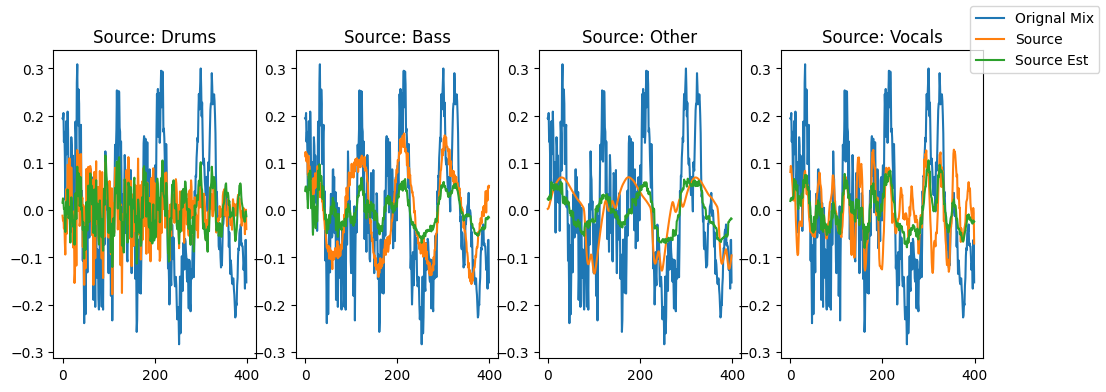

In [103]:
# Output for sisnr trained model for five epochs
fig, axes = plt.subplots(1,4, figsize=(12,4))
sources = ["Drums", "Bass", "Other", "Vocals"]

for i in range(4):
    axes[i].plot(x_0[0], label="Orignal Mix")
    axes[i].plot(y_0[0][i], label=f"Source")
    axes[i].plot(x_0_out[0][i], label=f"Source Est")

    if i==0:
        fig.legend()

    axes[i].set_title(f"Source: {sources[i]}")

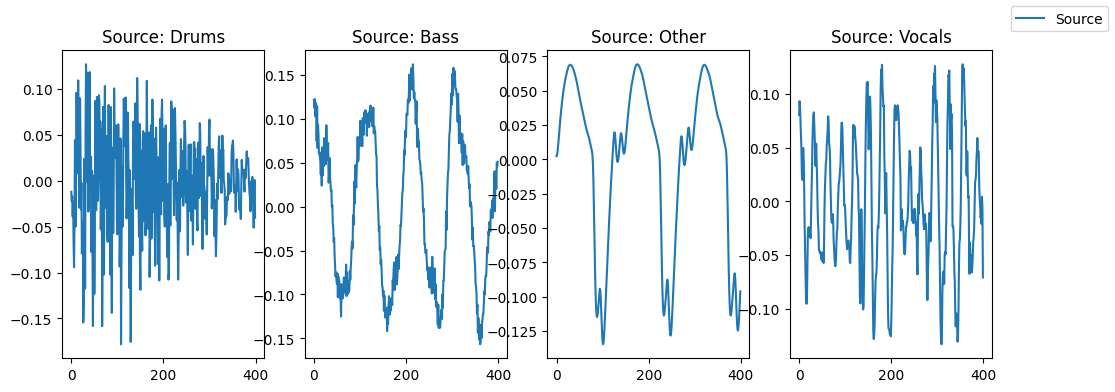

In [98]:
# Output for sisnr trained model for five epochs
fig, axes = plt.subplots(1,4, figsize=(12,4))
sources = ["Drums", "Bass", "Other", "Vocals"]

for i in range(4):

    axes[i].plot(y_0[0][i], label=f"Source")


    if i==0:
        fig.legend()

    axes[i].set_title(f"Source: {sources[i]}")

In [51]:
N = 1840
starts = list(range(0,N,9))
starts

[0,
 9,
 18,
 27,
 36,
 45,
 54,
 63,
 72,
 81,
 90,
 99,
 108,
 117,
 126,
 135,
 144,
 153,
 162,
 171,
 180,
 189,
 198,
 207,
 216,
 225,
 234,
 243,
 252,
 261,
 270,
 279,
 288,
 297,
 306,
 315,
 324,
 333,
 342,
 351,
 360,
 369,
 378,
 387,
 396,
 405,
 414,
 423,
 432,
 441,
 450,
 459,
 468,
 477,
 486,
 495,
 504,
 513,
 522,
 531,
 540,
 549,
 558,
 567,
 576,
 585,
 594,
 603,
 612,
 621,
 630,
 639,
 648,
 657,
 666,
 675,
 684,
 693,
 702,
 711,
 720,
 729,
 738,
 747,
 756,
 765,
 774,
 783,
 792,
 801,
 810,
 819,
 828,
 837,
 846,
 855,
 864,
 873,
 882,
 891,
 900,
 909,
 918,
 927,
 936,
 945,
 954,
 963,
 972,
 981,
 990,
 999,
 1008,
 1017,
 1026,
 1035,
 1044,
 1053,
 1062,
 1071,
 1080,
 1089,
 1098,
 1107,
 1116,
 1125,
 1134,
 1143,
 1152,
 1161,
 1170,
 1179,
 1188,
 1197,
 1206,
 1215,
 1224,
 1233,
 1242,
 1251,
 1260,
 1269,
 1278,
 1287,
 1296,
 1305,
 1314,
 1323,
 1332,
 1341,
 1350,
 1359,
 1368,
 1377,
 1386,
 1395,
 1404,
 1413,
 1422,
 1431,
 1440,

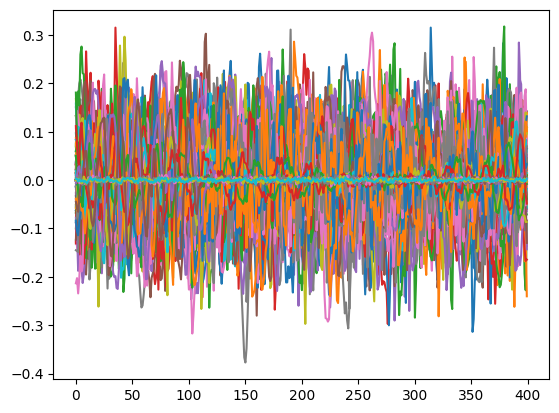

In [24]:
for i in range(100):
    plt.plot(x_0[i])

In [7]:
def check_for_nan_or_inf(tensor):
    has_nan = tf.reduce_any(tf.math.is_nan(tensor))
    has_inf = tf.reduce_any(tf.math.is_inf(tensor))
    return has_nan, has_inf

# Assuming `dataset` is your tf.data.Dataset
for batch in batches:
    x, y = batch
    has_nan_x, has_inf_x = check_for_nan_or_inf(x)
    has_nan_y, has_inf_y = check_for_nan_or_inf(y)
    
    if has_nan_x or has_inf_x:
        print("Found NaN or Inf in input features")
    if has_nan_y or has_inf_y:
        print("Found NaN or Inf in input labels")

NameError: name 'batches' is not defined

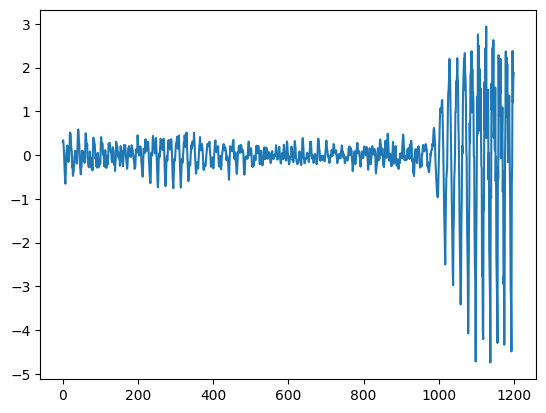

: 

In [10]:
# s_hat = cnn(x_0)
# plt.plot(s_hat[1,1,:])
plt.plot(y_0[0,0,:])

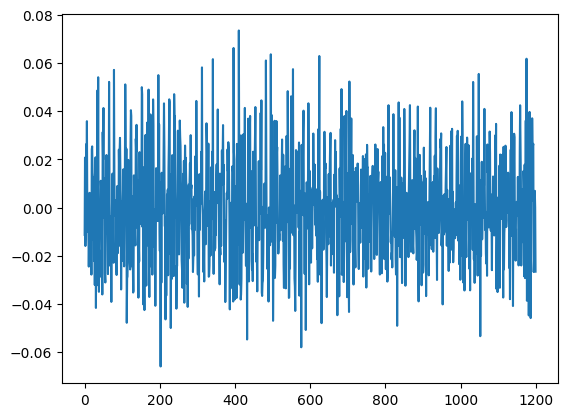

In [14]:
plt.plot(y_0[1,0,:])

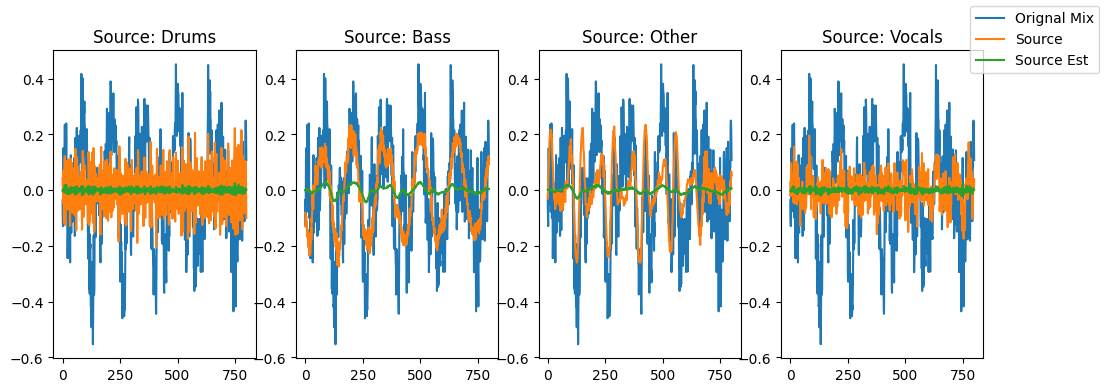

In [27]:
# Output for sisnr trained model for five epochs
fig, axes = plt.subplots(1,4, figsize=(12,4))
sources = ["Drums", "Bass", "Other", "Vocals"]

for i in range(4):
    axes[i].plot(x_0[0], label="Orignal Mix")
    axes[i].plot(y_0[0][i], label=f"Source")
    axes[i].plot(output_x_0[0][i], label=f"Source Est")

    if i==0:
        fig.legend()

    axes[i].set_title(f"Source: {sources[i]}")

In [ ]:
cnn.load_weights("training_mse_0/cp.ckpt")

In [26]:
output_x_0 = cnn(x_0)

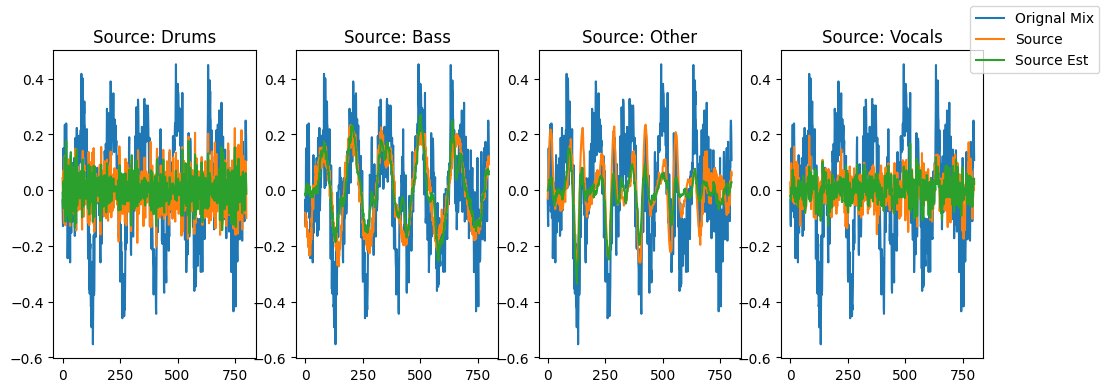

In [25]:
# Output for logl2 trained model for five epochs
fig, axes = plt.subplots(1,4, figsize=(12,4))
sources = ["Drums", "Bass", "Other", "Vocals"]

for i in range(4):
    axes[i].plot(x_0[0], label="Orignal Mix")
    axes[i].plot(y_0[0][i], label=f"Source")
    axes[i].plot(output_x_0[0][i], label=f"Source Est")

    if i==0:
        fig.legend()

    axes[i].set_title(f"Source: {sources[i]}")




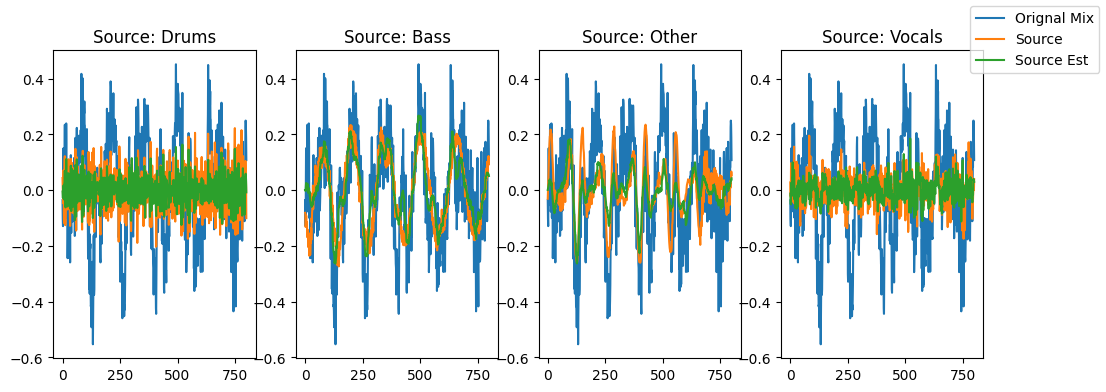

In [29]:
# Output for mse trained model for five epochs

fig, axes = plt.subplots(1,4, figsize=(12,4))
sources = ["Drums", "Bass", "Other", "Vocals"]

for i in range(4):
    axes[i].plot(x_0[0], label="Orignal Mix")
    axes[i].plot(y_0[0][i], label=f"Source")
    axes[i].plot(output_x_0[0][i], label=f"Source Est")

    if i==0:
        fig.legend()

    axes[i].set_title(f"Source: {sources[i]}")

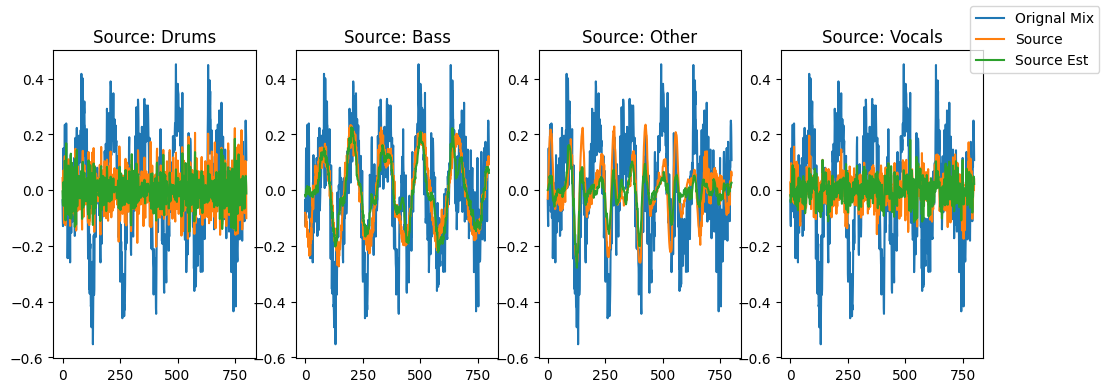

In [32]:
# Output for sdr trained model for five epochs

fig, axes = plt.subplots(1,4, figsize=(12,4))
sources = ["Drums", "Bass", "Other", "Vocals"]

for i in range(4):
    axes[i].plot(x_0[0], label="Orignal Mix")
    axes[i].plot(y_0[0][i], label=f"Source")
    axes[i].plot(output_x_0[0][i], label=f"Source Est")

    if i==0:
        fig.legend()

    axes[i].set_title(f"Source: {sources[i]}")

In [4]:
create_fit_save(dataset)

Epoch 1/8
4000/4000 [==============================] - ETA: 0s - loss: 1.4906 - accuracy: 0.3134
Epoch 1: saving model to training_LOGL2_2\cp.ckpt
4000/4000 [==============================] - 2900s 717ms/step - loss: 1.4906 - accuracy: 0.3134
Epoch 2/8
4000/4000 [==============================] - ETA: 0s - loss: 1.4869 - accuracy: 0.3145
Epoch 2: saving model to training_LOGL2_2\cp.ckpt
4000/4000 [==============================] - 2887s 722ms/step - loss: 1.4869 - accuracy: 0.3145
Epoch 3/8
4000/4000 [==============================] - ETA: 0s - loss: 1.4835 - accuracy: 0.3158
Epoch 3: saving model to training_LOGL2_2\cp.ckpt
4000/4000 [==============================] - 2891s 723ms/step - loss: 1.4835 - accuracy: 0.3158
Epoch 4/8
4000/4000 [==============================] - ETA: 0s - loss: 1.4802 - accuracy: 0.3164
Epoch 4: saving model to training_LOGL2_2\cp.ckpt
4000/4000 [==============================] - 2889s 722ms/step - loss: 1.4802 - accuracy: 0.3164
Epoch 5/8
4000/4000 [=======

KeyboardInterrupt: 

In [7]:
cnn.compile(optimizer='adam',
              loss=SDR(),
              metrics=['accuracy']
              )

In [8]:
history = cnn.fit(dataset, epochs=10)

Epoch 1/10
400/400 [==============================] - 1168s 3s/step - loss: -2.3059 - accuracy: 0.1951
Epoch 2/10
400/400 [==============================] - 1174s 3s/step - loss: -2.8136 - accuracy: 0.2347
Epoch 3/10
 74/400 [====>.........................] - ETA: 3:41 - loss: -2.9191 - accuracy: 0.2421

KeyboardInterrupt: 

Text(0.5, 0, 'Epoch')

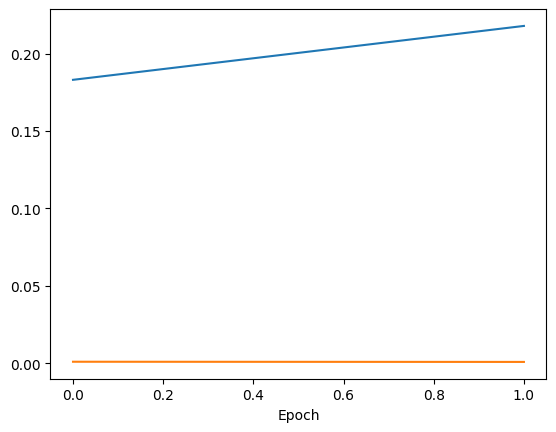

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'MSE')
plt.xlabel('Epoch')

In [2]:
class ConvTasNet(models.Model):
    """
    Full Conv-TasNet model, coded in TensorFlow. I heavily relied upon, upon Jane Wu's TensorFlow implementation (https://github.com/JaneWuNEU/Conv-TasNet-2)
    to get this to work. nplab's and kaituoxu's PyTorch implementations of the model were also instrumental for my understanding of the model.
    
    To explain what the model is doing in the most basic way, it takes a dataset of overlapping chunks of a audio in a waveform format then 
    encodes them using a simple 1D convolution. With this input data, the model is then put through several iterations of downsampling to get 
    features from the data. These features are then turned into separate masks for each target source in the audio data. Finally the masks are 
    applied to the orginal encoded data, which is finally put back into its orginal waveform data format with a Transpose 1D convolution.

    To understand the shape of the data throughout the model, I highly recommend looking at the Parameters class documentation, but I tried to 
    give documentation to the important paramters throughout the layers documentation as well. 
    """
    def __init__(self, param: Parameters):
        super().__init__(name="ConvTasNet")
        self.param = param


        self.encoder = Encoder(self.param)
        self.separator = Separator(self.param)
        self.decoder = Decoder(self.param)

    def call(self, x):
        w = self.encoder(x)
        m_i = self.separator(w)

        decoded = self.decoder(w, m_i)

        return decoded

In [19]:
param = Parameters(naplab_impl=True)

In [20]:
cnn = ConvTasNet(param)
output = cnn(data)

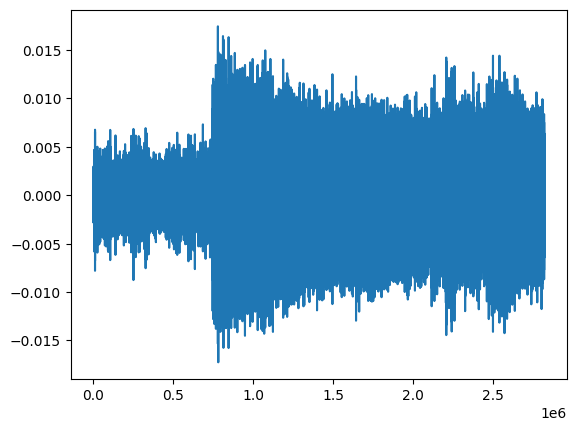

In [13]:
plt.plot(output[0,0,:])

In [31]:
class Encoder(layers.Layer):
    """ 
    First step of model not counting, preprocessing data. Puts the inputs through a 1D Convolutional layer with N output channels. The encoder also includes a activation
    function of a ReLU layer.

    Args: 
        N: Encoder output size
        win: Kernel size of encoder.

    """
    def __init__(self, param: Parameters):
        super(Encoder, self).__init__(name='Encoder')
        self.U = layers.Conv1D(param.N,param.win,strides=param.overlap,activation="relu",use_bias=False, data_format="channels_last")

    def call(self, x): # (M, T)
        batch_count,sample_count = x.shape
        x = tf.reshape(x, (batch_count, sample_count, 1)) # (M, T, 1)
        return self.U(x) # (M, K, N)

        
class Separator(layers.Layer):
    """ 
    To begin the we take the output of the encoder which we then normalize it and feed it into a 1x1Convolution.
    This layer repeats a Temporal Convolution Block multiple times, wherin, what is refered to as a Conv1D Block in the paper, is repeated
    several times for each instance of a Temporal Convolutional Block. Finally the output of the Temporal blocks is input into a 1x1 Convolution
    with C*N output channels.
    Args:
        N: (int) Encoder output size
        B: (int) Bottleneck Conv1DBlock output size
        R: (int) Amount of repeats of the Temporal Convolution block
        X: (int) Amount of times Conv1DBlock is applied in a Temporal Convolution block
        H: (int) Conv1DBlock input size
        C: (int) Amount of sources being estimated
        P: (int) Size of kernel in depthwise convolutions
    
    """
    def __init__(self, param: Parameters):
        super(Separator, self).__init__(name='Separator')
        self.C = param.C
        self.N = param.N
        self.skip=param.skip
        if param.casual:
            self.normalization = cLN(param.N)
        else:
            self.normalization = gLN(param.N) 
        self.bottle_neck = layers.Conv1D(param.B,1)
        
        self.temporal_conv = [TemporalConv(param.X, param.H, param.B, param.P, param.casual, skip=param.skip) for r in range(param.R)]
        self.skip_add = layers.Add()
        self.prelu = layers.PReLU()
        self.m_i = layers.Conv1D(param.C*param.N, 1)

    def call(self, w): # (M, K, N)
        M, K, _ = w.shape
        normalized_w = self.normalization(w) # (M, K, N)
        output = self.bottle_neck(normalized_w) # (M, K, B)
        if self.skip:
            skip_conn = tf.zeros(output.shape)
        for block in self.temporal_conv:
            if self.skip:
                output, skips = block(output)
                skip_conn = self.skip_add([skip_conn, skips])
            else:
                output = block(output)
        # (M, K, B)
        if self.skip:
            output = skip_conn

        output = self.prelu(output)
        estimated_masks = self.m_i(output) # (M, K, C*N)
        estimated_masks = activations.sigmoid(tf.reshape(estimated_masks, (M, self.C, K, self.N))) # (M, C, K, N)
        return estimated_masks
    
class Decoder(layers.Layer):
    """ 
    This is layer is final part of the model. Taking the features obtained, from the Conv1D blocks masks are finally combined into with the
    original mix into the estimated sources.

    Args:
        L : (int) length of individual chunks of audio.
    """
    def __init__(self, param: Parameters):
        super(Decoder, self).__init__(name='Decoder')
        self.C = param.C
        self.L = param.L
        self.N = param.N
        self.win = param.win
        self.naplab_impl = param.naplab_impl
        self.overlap = param.overlap

        if not self.naplab_impl:
            self.transpose_conv = layers.Conv1DTranspose(self.L,self.win,strides=param.overlap,use_bias=False)
        else:
            self.transpose_conv = layers.Conv1DTranspose(1,self.win,strides=param.overlap,use_bias=False)

    def call(self, w, m_i): # (M, K, N) (M, C, K, N)
        M,K,_, = w.shape

        w = tf.reshape(tf.repeat(w, 4, axis=0),m_i.shape) # (M, K, N) -> (M, C, K, N)
        output = w * m_i # (M, C, K, N) * (M, C, K, N) 
        output = self.transpose_conv(tf.reshape(output, (M*self.C, K, self.N))) # (M*C, T, 1) or (M*C, T, L)Okay so the official naplab implementation turns the encoded sources directly back into its wavform essentially 
                                                                                # but the kaituoxo one seems to turn it into a 16 channel output then subsetting to only take the first chunk to deal with overlap
        if self.naplab_impl:
            output = output[:,:,:self.overlap]
        output = tf.reshape(output, (M,self.C,-1)) # (M, C, T)
        return output   

 

In [4]:
def make_base_dataset(M=1,T=320008):
    root_mus = '../MUSDB18'
    mus = musdb.DB(root=root_mus, subsets="train")
    song_list=[]
    for m in range(M):
        track = mus[m]
        audio_l,audio_r = track.audio[:T].T
        song_list.extend([audio_l,audio_r])
    
    return np.array(song_list)

data = make_base_dataset(T = 44100*4)

data.shape


(2, 176400)

In [14]:
x, y = datasets.load_unpack_tensordata()

In [15]:
x_0 = tf.reshape(x[0],(200, 40*16))
x_0.shape

TensorShape([200, 640])

In [3]:
param = Parameters()

In [7]:
param.win // 2
del data

In [16]:
encoder = Encoder(param)
w = encoder(x_0)
w.shape

TensorShape([50, 499, 512])

In [17]:
depthwise = DepthwiseConv(param.H, param.B, param.P, dilation=2, casual=True, skip=param.skip)
convblock = Conv1DBlock(param.H, param.B, param.P, dilation=2, casual=True)


In [33]:
sep = Separator(param)
output = sep(w)

In [41]:
decoder = Decoder(param)
decoded = decoder(w, output)
decoded.shape

Mask multi (200, 4, 79, 512)
transpose conv (800, 640, 1)


TensorShape([200, 4, 640])

In [21]:
output.shape

TensorShape([200, 4, 79, 512])

In [7]:
root_mus = '../MUSDB18'
mus = musdb.DB(root=root_mus, subsets="train")

In [13]:
audio_l,audio_r =mus[0].audio[:320000].T
audio_l.shape

(320000,)

## Overall Architecture

Looking at the model from a top down view, the data follows this pipeline:

Data ---> Encoder ----> Separator ---> Decoder ---> Create Sources

In [ ]:
# Params as globals for testing purposes
M=200
K=40
L=16 # Chunk size
C=4 # Amount of sources being estimated
N=512 # Encoder output size
B=128 # Conv1DBlock output size
H=512 # Conv1DBlock input size
P=3
R=3 # Amount of repeats of the Temporal Convolution block
X=8 # Amount of times Conv1DBlock is applied in a Temporal Convolution block
T=3000 # TODO: figure out how to get this param
dilation = 1
overlap=8
casual=False

In [53]:
class ConvTasNet(models.Model):
    """
    
    """
    def __init__(self,
                 L: int=16, # Chunk size
                 C: int=4, # Amount of sources being estimated
                 N: int=512, # Encoder output size
                 B: int=128, # Conv1DBlock output size
                 H: int=512, # Conv1DBlock input size
                 P: int=3, # Kernel size of Conv1DBlocks
                 R: int=3, # Amount of repeats of the Temporal Convolution block
                 X: int=8, # Amount of times Conv1DBlock is applied in a Temporal Convolution block
                 T: int=3000, # TODO: figure out how to get this param
                 # win: int=2, # Size of encoder-decoder kernels
                 overlap: int=8,
                 skip: bool=True,
                 casual: bool=False
                ):
        super().__init__(name="ConvTasNet")
        self.L = L
        self.C = C
        self.N = N
        self.B = B
        self.H = H
        self.R = R
        self.X = X
        self.T = T
        self.P = P
        # self.win = win
        self.overlap = overlap
        self.skip = skip
        self.casual = casual


        self.encoder = Encoder(self.N)
        self.separator = Separator(self.N, self.B, self.R, self.X, self.H, self.C, self.P, self.casual, self.skip)
        self.decoder = Decoder(self.L)

    def call(self, x):
        w = self.encoder(x)
        m_i = self.separator(w)

        decoded = self.decoder(m_i, w)

        return decoded
    


In [54]:
cnn = ConvTasNet()
cnn_output = cnn(x_batches[0])
cnn_output.shape

TensorShape([200, 4, 40, 16])

In [32]:
class Conv1DBlock(layers.Layer):
    def __init__(self, H, B, P, dilation, casual, skip = True):
        super(Conv1DBlock, self).__init__(name='Conv1DBlock')
        self.skip = skip
        self.input_channels = layers.Conv1D(H,1)
        self.prelu = layers.PReLU()
        if casual:
            self.norm = cLN(H)
        else:
            self.norm = gLN(H)
        
        self.depthwise = DepthwiseConv(H, B, P, dilation, casual, skip=self.skip)

    def call(self, input):
        input_channels = self.input_channels(input)
        input_channels = self.prelu(input_channels)
        input_channels = self.norm(input_channels)
        if self.skip:
            res, skip = self.depthwise(input_channels)
            return res, skip

        res = self.depthwise(input_channels, skip=self.skip)
        return res

class DepthwiseConv(layers.Layer):
    def __init__(self, H, B, P, dilation, casual, skip=True):
        super(DepthwiseConv, self).__init__(name='DepthwiseConv')
        self.skip = skip
        if casual:
            padding_type = "causal"
            self.norm = cLN(H)
        else:
            padding_type = "same"
            self.norm = gLN(H)

        self.conv1d = layers.Conv1D(H, P, dilation_rate=dilation, padding=padding_type, groups=H)
        self.prelu = layers.PReLU()
        
        self.res_out = layers.Conv1D(B, 1)
        if self.skip:
            self.skip_out = layers.Conv1D(B, 1)
    
    def call(self, input):
        input = self.conv1d(input) 
        input = self.prelu(input)
        input = self.norm(input)
        res = self.res_out(input)
        if self.skip:
            skip_out = self.skip_out(input)
            return res, skip_out
        
        return res

class TemporalConv(layers.Layer):
    def __init__(self, X, H, B, P, casual, skip=True):
        super(TemporalConv,self).__init__(name='TemporalConv')
        self.skip=skip
        self.blocks = []
        for i in range(X):
            dilation = 2 ** i
            self.blocks += [Conv1DBlock(H, B, P, dilation, casual, skip=self.skip)]
        self.res_add = layers.Add()
        self.skip_add = layers.Add()
    
    def call(self, block_input):
        if self.skip:
            skip_conn = tf.zeros(block_input.shape)
        for block in self.blocks:    
                if self.skip:
                    res, skip = block(block_input)
                    block_input = self.res_add([block_input, res])
                    skip_conn = self.skip_add([skip_conn,skip])
                else:
                    res = block(block_input)
                    block_input = self.res_add([block_input, res])
        if self.skip:
            return block_input, skip_conn
        return block_input
        

In [18]:
class Conv1DBlock(layers.Layer):
    def __init__(self, H, B, P, dilation, casual, skip = True):
        super(Conv1DBlock, self).__init__(name='Conv1DBlock')
        self.skip = skip
        self.input_channels = layers.Conv1D(H,1)
        self.prelu = layers.PReLU()
        if casual:
            self.norm = cLN(H)
        else:
            self.norm = gLN(H)
        
        self.depthwise = DepthwiseConv(H, B, P, dilation, casual, skip=self.skip)

    def call(self, input):
        input_channels = self.input_channels(input)
        input_channels = self.prelu(input_channels)
        input_channels = self.norm(input_channels)
        if self.skip:
            res, skip = self.depthwise(input_channels)
            return res, skip

        res = self.depthwise(input_channels, skip=self.skip)
        return res

class DepthwiseConv(layers.Layer):
    def __init__(self, H, B, P, dilation, casual, skip=True):
        super(DepthwiseConv, self).__init__(name='DepthwiseConv')
        self.skip = skip
        if casual:
            padding_type = "causal"
            self.norm = cLN(H)
        else:
            padding_type = "same"
            self.norm = gLN(H)

        self.conv1d = layers.Conv1D(H, P, dilation_rate=dilation, padding=padding_type, groups=H)
        self.prelu = layers.PReLU()
        
        self.res_out = layers.Conv1D(B, 1)
        if self.skip:
            self.skip_out = layers.Conv1D(B, 1)
    
    def call(self, input):
        input = self.conv1d(input) 
        input = self.prelu(input)
        input = self.norm(input)
        res = self.res_out(input)
        if self.skip:
            skip_out = self.skip_out(input)
            return res, skip_out
        
        return res

class TemporalConv(layers.Layer):
    def __init__(self, X, H, B, P, casual, skip=True):
        super(TemporalConv,self).__init__(name='TemporalConv')
        self.skip=skip
        self.blocks = []
        for i in range(X):
            dilation = 2 ** i
            self.blocks += [Conv1DBlock(H, B, P, dilation, casual, skip=self.skip)]
        self.res_add = layers.Add()
        self.skip_add = layers.Add()
    
    def call(self, block_input):
        skip_list = []
        for block in self.blocks:    
                if self.skip:
                    res, skip = block(block_input)
                    block_input = self.res_add([block_input, res])
                    skip_list.append(skip)
                else:
                    res = block(block_input)
                    block_input = self.res_add([block_input, res])
        if self.skip:
            skip_conn = self.skip_add(skip_list)
            return block_input, skip_conn
        return block_input
        


In [44]:

sep = Separator(param.N,param.B,param.R,param.X,param.H,param.C,param.P,True)

TypeError: __init__() takes 2 positional arguments but 9 were given

In [35]:
dep_res,dep_out = depthwise(w)
print(dep_out.shape, dep_res.shape)


(6, 40000, 128) (6, 40000, 128)


In [40]:
conv_out = convblock(w)
conv_out[0].shape

TensorShape([6, 40000, 128])

In [42]:
temp_out = tempconv(w)
temp_conv.shape

ValueError: Exception encountered when calling layer "TemporalConv" "                 f"(type TemporalConv).

Inputs have incompatible shapes. Received shapes (40000, 512) and (40000, 128)

Call arguments received by layer "TemporalConv" "                 f"(type TemporalConv):
  • block_input=tf.Tensor(shape=(6, 40000, 512), dtype=float32)

In [15]:
def choose_norm(casual, H):
    """ 
    Chooses normalization type based on value of casual.

    Args:
        casual: (bool) chooses type of normalization applied.
    Returns:
        cLN or gLN (layer)
    """
    if casual:
        return cLN(H)
    else:
        return gLN(H)

class cLN(layers.Layer):
    def __init__(self, H, EPS = 1e-8):
        super(cLN, self).__init__(name="cLN")
        self.EPS = EPS
        shape = (1,1,H)
        self.gamma = tf.Variable(tf.ones(shape),trainable=True,shape=shape)
        self.beta = tf.Variable(tf.zeros(shape),trainable=True,shape=shape)

    def call(self, input):
        # (M, K, H)
        E_f = tf.math.reduce_mean(input, axis=2, keepdims=True) # (M, K, 1)
        var = tf.math.reduce_variance(input, axis=2, keepdims=True)# (M, K, 1)

        normalized = self.gamma * (input - E_f) / tf.math.sqrt(var + self.EPS) + self.beta
        # (M, K, H)
        return normalized
    
class gLN(layers.Layer):
    def __init__(self, H, EPS = 1e-8):
        super(gLN, self).__init__(name="gLN")
        self.EPS = EPS
        shape = (1,1,H)
        self.gamma = tf.Variable(tf.ones(shape),trainable=True,shape=shape)
        self.beta = tf.Variable(tf.zeros(shape),trainable=True,shape=shape)

    def call(self, input):
        # (M, K, H)
        E_f = tf.math.reduce_mean(input, axis=(1,2), keepdims=True) # (M, 1, 1)
        var = tf.math.reduce_variance(input, axis=(1,2), keepdims=True)# (M, 1, 1)

        normalized = self.gamma * (input - E_f) / tf.math.sqrt(var + self.EPS) + self.beta
        # (M, K, H)
        return normalized


In [26]:
def show_norm(input):
    fig, axes = plt.subplots(1,3, figsize=(12, 4))

    norm_c = cLN(H)(input)
    norm_g = gLN(H)(input)

    axes[0].set_title("Not normalized")
    axes[0].plot(input[0][0])

    axes[1].set_title("Casual normalization")
    axes[1].plot(norm_c[0][0])

    axes[2].set_title("Global normalization")
    axes[2].plot(norm_g[0][0])


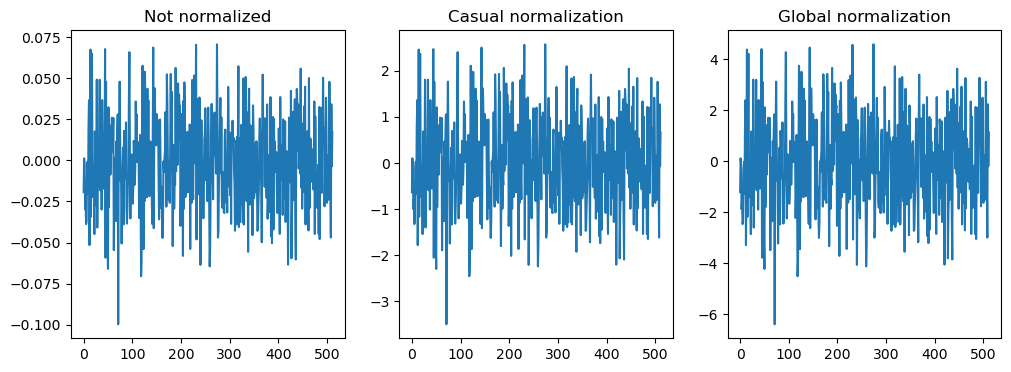

In [30]:
show_norm(test_encoded)